# Jared Mlekush

## <u>Bias-Variance Trade-off</u>

<b>What is Bias?</b>
- Error between average model prediction and ground truth
- The bias of the estimated function tells us the capacity of the underlying model to predict the values

<b>What does High Bias imply?</b>
- Overly-simplified Model 
- Under-fitting - fails to capture data trends
- High error on both test and train data

-------------------------------------------------------

<b>What is Variance?</b>
- Average variability in the model prediction for the given dataset
- The variance of the estimated function tells you how much the function can adjust to the change in the dataset

<b>What does High Variance imply?</b>
- Overly-complex Model
- Over-fitting - includes the noise when modeling the data set
- Low error on train data and high on test     

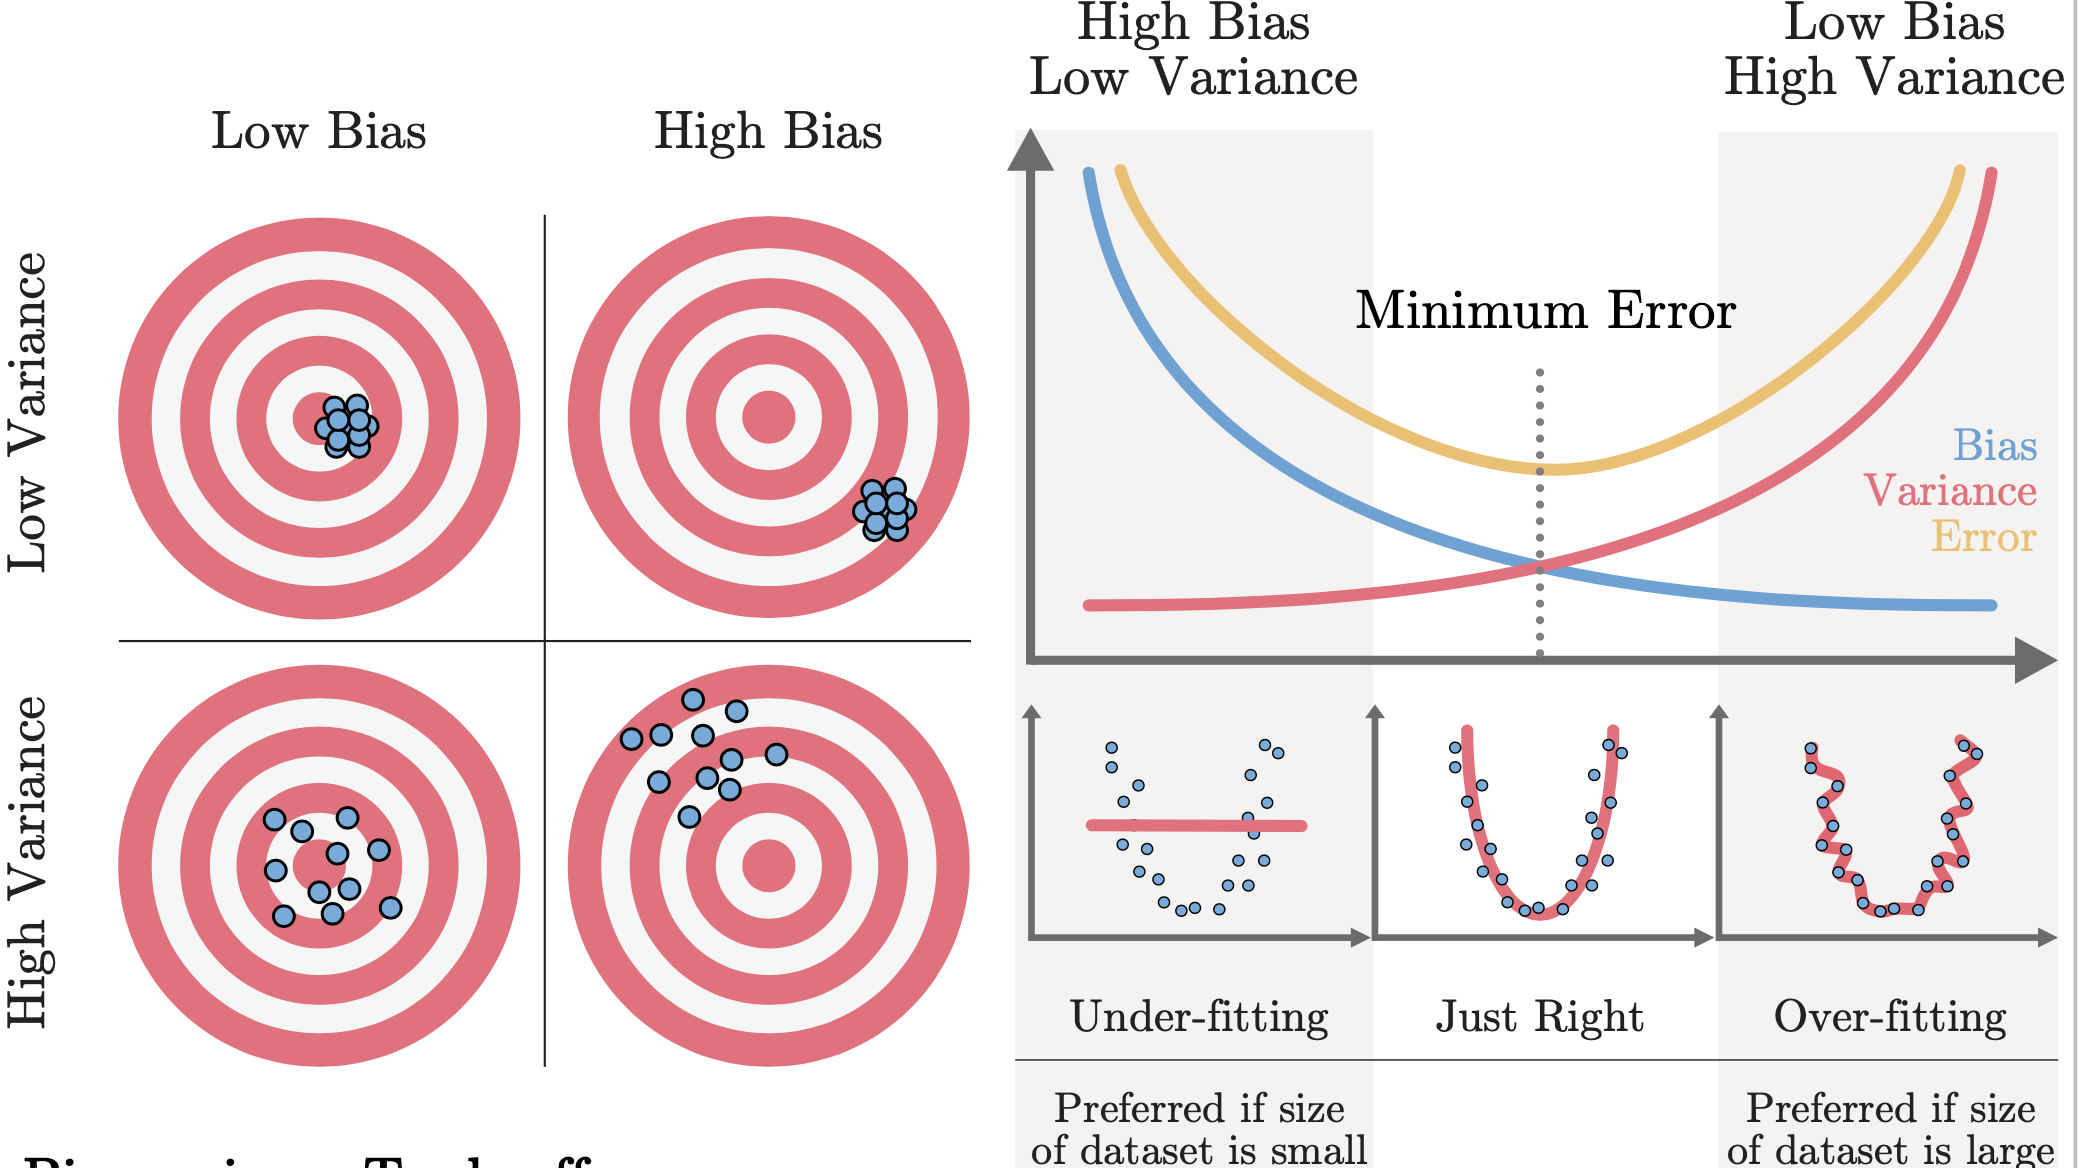

<b>What is ideal?</b>

- Low Bias and Low Variance
- Finding the happy median between Variance and Bias generally leads to the minimum error when testing on the test set

<b> Important to note </b>
- Generally speaking, if you increase the complexity of the underlying system, 
the <b>bias</b> of the system <i>decreases</i> while the <b>variance</b> <i>increases</i>. They 
are inversely proportional to each other and you can’t decrease both of them at the same time. 
This idea serves as the basis for the "bias-variance tradeoff".

<b>Bias variance Trade-off</b>

- In general, increasing bias reduces variance and vice versa
- Error = bias^2 + variance + irreducible error (irreducible error is error because of noise)
- The best model is where you reduce the error
- This (the best model) is obtained when there is a compromise between bias and variance

-----------------

<b>Summary:</b>

- For clean and large enough dataset:
    - The greater the model complexity the lower the estimation error, the better the approximation.
    - The greater the model complexity the lower the bias
    - The greater the model complexity the lower the variance

- For noisy dataset:
    - Greater model complexity doesn’t mean lower estimation error
    - The greater the model complexity the lower the bias
    - The greater the model complexity the higher the variance

<b>Final Thoughts</b>
- Since the dataset in the real world is almost always noisy and limited, we need to find the optimum complexity of the underlying model that gives us the minimum error on the dataset. Higher complexity doesn’t guarantee the best fit.

------------------

<b> Visual Example </b>

The code below plots the estimation of the sine curve for different polynomials with varying degrees. With degree of only 1 the polynomial is too simple to capture the sine curve. On the other side of the spectrum we have a polynomial of degree 11, which is too complex - so much so that it even encapsulates the noise. With the graph we can see an example of "Bias-Variance Tradeoff" and see that the minimum error is found when the two are balanced.

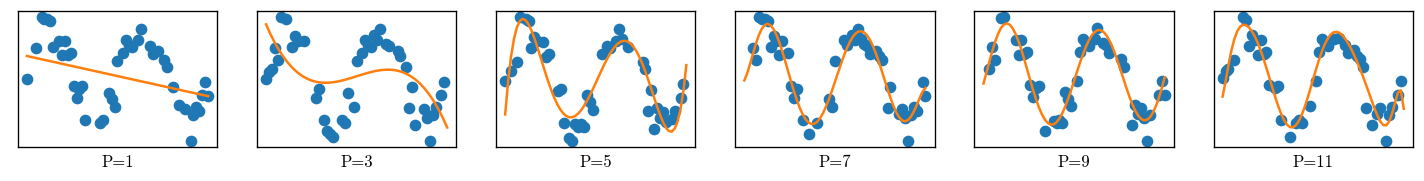

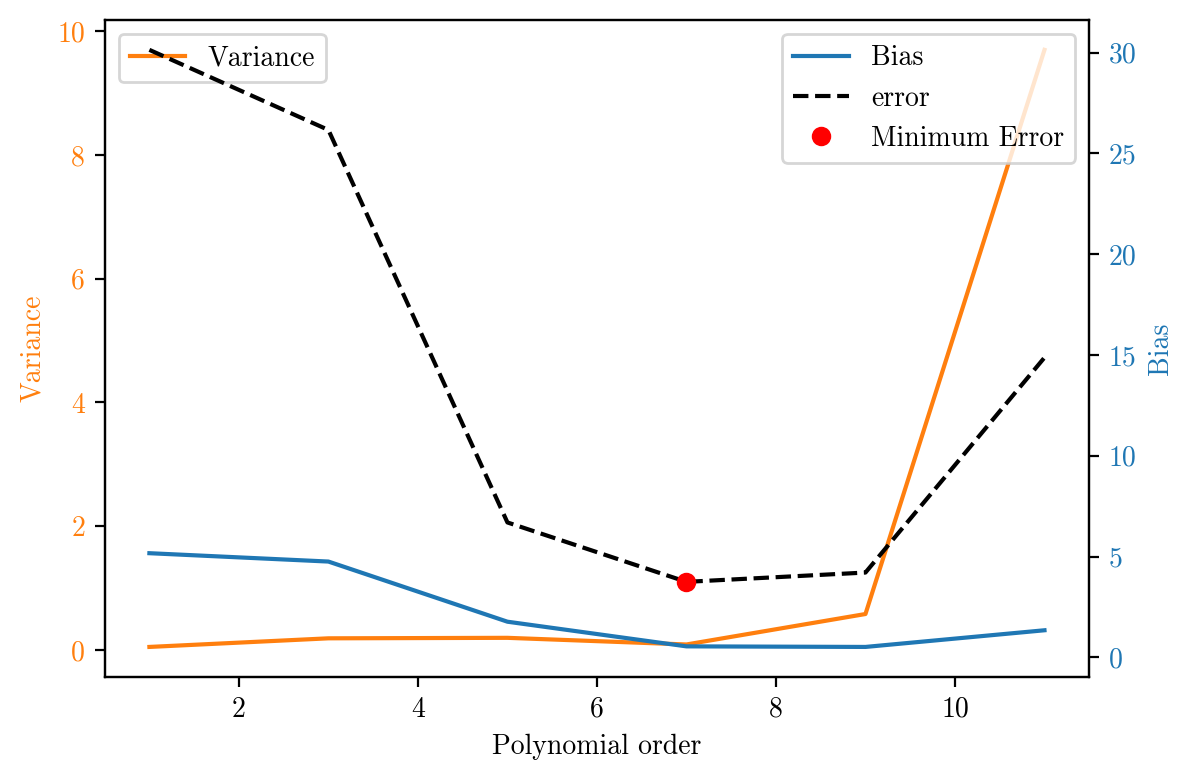

In [3]:
# This code found here: 
# https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-and-visualizing-it-with-example-and-python-code-7af2681a10a7

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif'] = "cmr10"
import random
np.random.seed(54)
# random.seed(4959)

def dist_function(x):
    f_x = np.sin(x)
    return f_x

def gen_data(x):
    f_x = dist_function(x)
    b = 0.4
    y = f_x + np.random.uniform(-b, b, len(x))
    sigma = 1/12*(2*b)**2
    return y, f_x, sigma


def get_rand_data(len_ratio, x, y, f_x):
    m = len(x)
    m_new = int(np.round(len_ratio*m))
    ind = random.sample(range(m), m_new)
    ind = np.sort(ind)

    x1 = x[ind]
    y1 = y[ind]
    f_x1 = f_x[ind]

    return x1, y1, f_x1


x_orig = np.arange(0, 4 * np.pi, .2)

y_orig, f_x_orig, sigma = gen_data(x_orig)
p_order = [1, 3, 5, 7, 9, 11]
num_data = 2000

f, ax = plt.subplots(1,len(p_order), figsize=(15, 1.5), dpi=120, facecolor='w', edgecolor='k')
t = np.arange(0.1, 4*np.pi, .2)
P=[]
bb=[]
vv=[]
for i, p_val in enumerate(p_order):
    exp_f_x = np.zeros(len(t))
    exp_f_x_plot = np.zeros(len(x_orig))
    var = np.zeros(len(t))
    for j in range(num_data):
        x, y, f_x = get_rand_data(0.7, x_orig, y_orig, f_x_orig)
        p = np.poly1d(np.polyfit(x, y, p_val))
        # ax[j, i].plot(x, y, 'o', t, p(x_orig), '-')
        P.append(p)
        exp_f_x = exp_f_x + p(t)
        exp_f_x_plot = exp_f_x_plot + p(x_orig)

    exp_f_x = exp_f_x/num_data
    exp_f_x_plot = exp_f_x_plot / num_data
    ax[i].plot(x, y, 'o', x_orig, exp_f_x_plot, '-')
    plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
    ax[i].set_xlabel('P='+str(p_order[i]))
    bias = np.linalg.norm(exp_f_x-dist_function(t))
    bb.append(bias)

    for j in range(num_data):
        p_t = P.pop(0)
        var = var + np.square(p_t(t)-exp_f_x)
    var = var/num_data
    variance = np.linalg.norm(var)
    vv.append(variance)


# print("bias: ", bb)
# print("var: ",vv)

fig, ax1 = plt.subplots(dpi=200)

color = 'tab:orange'
ax1.set_xlabel('Polynomial order')
ax1.set_ylabel('Variance', color=color)
ax1.plot(p_order, vv, color=color, label = 'Variance')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Bias', color=color)
ax2.plot(p_order, bb, color=color,  label = 'Bias')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

error = np.square(bb)+vv+sigma*len(t)
min_ind = np.argmin(error)
plt.plot(p_order, error, 'k--', label = 'error')
plt.plot(p_order[min_ind], error[min_ind], 'ro', label= 'Minimum Error')
leg = ax2.legend(loc='upper right')
leg = ax1.legend(loc='upper left')
plt.show()